In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

# Step1: Read the data set  "Leads" and insepct the data Set

In [2]:
# read the data
leads=pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads.shape

(9240, 37)

In [4]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

## dropping the columns which have more than 3000 null values

In [6]:
leads = leads.drop(columns= [x for x in leads if(leads[x].isna().sum () > 3000) ])


In [7]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,Select,Mumbai,No,No,Modified


In [8]:
leads.shape

(9240, 31)

In [9]:
# drop the columns- City , country which are not relvant for the analysis/ current problem statement

leads=leads.drop(columns=['City','Country'])

In [10]:
leads.shape

(9240, 29)

In [11]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.854853,548.021466,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [12]:
leads.columns


Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [13]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## inspecting the columns - mainly the categorical variable with a level called- Select as mentioned in the problem statement and drop those columns which have them 

In [14]:
leads['Lead Number'].value_counts()

660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64

In [15]:
leads['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [16]:
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [17]:
leads['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [18]:
leads['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [19]:
leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [20]:
leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [21]:
leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [22]:
print(leads['What is your current occupation'].value_counts())
print(leads['What matters most to you in choosing a course'].value_counts())
print(leads['Search'].value_counts())
print(leads['Magazine'].value_counts())
print(leads['Newspaper Article'].value_counts())
print(leads['X Education Forums'].value_counts())


Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64
No     9226
Yes      14
Name: Search, dtype: int64
No    9240
Name: Magazine, dtype: int64
No     9238
Yes       2
Name: Newspaper Article, dtype: int64
No     9239
Yes       1
Name: X Education Forums, dtype: int64


In [23]:
print(leads['X Education Forums'].value_counts())

No     9239
Yes       1
Name: X Education Forums, dtype: int64


In [24]:
print(leads['Newspaper'].value_counts())
print(leads['Digital Advertisement'].value_counts())
print(leads['Through Recommendations'].value_counts())
print(leads['Receive More Updates About Our Courses'].value_counts())

No     9239
Yes       1
Name: Newspaper, dtype: int64
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64
No     9233
Yes       7
Name: Through Recommendations, dtype: int64
No    9240
Name: Receive More Updates About Our Courses, dtype: int64


In [25]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [26]:
print(leads['Update me on Supply Chain Content'].value_counts())
print(leads['Get updates on DM Content'].value_counts())
print(leads['Lead Profile'].value_counts())
print(leads['I agree to pay the amount through cheque'].value_counts())
print(leads['A free copy of Mastering The Interview'].value_counts())
print(leads['Last Notable Activity'].value_counts())

No    9240
Name: Update me on Supply Chain Content, dtype: int64
No    9240
Name: Get updates on DM Content, dtype: int64
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64
No    9240
Name: I agree to pay the amount through cheque, dtype: int64
No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails        

In [27]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [28]:
leads=leads.drop(columns=['Specialization','How did you hear about X Education','Lead Profile'])
leads.shape

(9240, 26)

In [29]:
# identify binary variables and map 1 to Yes and 0 to No
bin_var_list=['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

In [30]:
len(bin_var_list)

14

In [31]:
leads[bin_var_list].head()

,Do Not Email,Do Not Call,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No,No,No,No,No,No,No,No
2,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
3,No,No,No,No,No,No,No,No,No,No,No,No,No,No
4,No,No,No,No,No,No,No,No,No,No,No,No,No,No


In [32]:
leads[bin_var_list]=leads[bin_var_list].apply(lambda x:x.map({'Yes':1,'No':0}))
leads[bin_var_list].head()

,Do Not Email,Do Not Call,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
# identifying categorical variables and numerical variables in the data to prepare the data accodingly
cat_var_list=['Lead Origin','Lead Source','Last Activity','What is your current occupation','What matters most to you in choosing a course','Last Notable Activity']
print(len(cat_var_list))
num_var_list=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
print(len(num_var_list))

6
3


In [34]:
leads=leads.drop(columns=['Prospect ID'],axis=1)

In [35]:
leads.shape

(9240, 25)

# Data Preprocessing

1. we have 15 binary varaibles- including the target variable , 6 Categorical variables and 4 numerical variable in the data
2. we will create dummies for categorical varaibles and do the scaling of numercial variables.


In [36]:
# create dummies for categorical variables
dummies_cat_vars=pd.get_dummies(leads[cat_var_list],drop_first=True)
dummies_cat_vars.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [37]:
# merge dummy variable df with the main df
leads=pd.concat([leads,dummies_cat_vars],axis=1)
leads.head()


,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [38]:
# drop the original categorical varaibles from the dataset

leads=leads.drop(columns=cat_var_list)

In [39]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 81 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Lead Number                                                              9240 non-null   int64  
 1   Do Not Email                                                             9240 non-null   int64  
 2   Do Not Call                                                              9240 non-null   int64  
 3   Converted                                                                9240 non-null   int64  
 4   TotalVisits                                                              9103 non-null   float64
 5   Total Time Spent on Website                                              9240 non-null   int64  
 6   Page Views Per Visit                                                    

In [40]:
leads.describe()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9240.000000,9240.000000,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,9240.000000,9240.0,9240.000000,...,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.079437,0.000216,0.385390,3.445238,487.698268,2.362820,0.001515,0.0,0.000216,...,0.000108,0.001515,0.368723,0.019805,0.034416,0.000108,0.235065,0.003463,0.005087,0.000108
std,23405.995698,0.270435,0.014711,0.486714,4.854853,548.021466,2.161418,0.038898,0.0,0.014711,...,0.010403,0.038898,0.482485,0.139338,0.182304,0.010403,0.424062,0.058750,0.071142,0.010403
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,0.000000,0.000000,1.000000,12.000000,1.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,615479.000000,0.000000,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,637387.250000,0.000000,0.000000,1.000000,5.000000,936.000000,3.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,660737.000000,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
leads.isnull().sum()

Lead Number                                             0
Do Not Email                                            0
Do Not Call                                             0
Converted                                               0
TotalVisits                                           137
                                                     ... 
Last Notable Activity_Resubscribed to emails            0
Last Notable Activity_SMS Sent                          0
Last Notable Activity_Unreachable                       0
Last Notable Activity_Unsubscribed                      0
Last Notable Activity_View in browser link Clicked      0
Length: 81, dtype: int64

In [42]:
## two columns Total Visits and Page views per visit are having null values- these are numerical columns and % of null values are low in number hence can be imputed with Mean value of the column
leads = leads[~np.isnan(leads['TotalVisits'])]
leads.shape

(9103, 81)

In [43]:
leads = leads[~np.isnan(leads['Page Views Per Visit'])]
leads.shape

(9103, 81)

In [44]:
leads.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,0,0,1,2.0,1428,1.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [45]:
# X and y varibale split
X= leads.drop(columns=['Lead Number','Converted'])
y=leads.Converted

In [46]:
X.shape

(9103, 79)

In [47]:
# test, Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [48]:
X_train.shape

(6372, 79)

In [49]:
# feature scaling- scaling of categorical varaibles

scaler = StandardScaler()

X_train[num_var_list] = scaler.fit_transform(X_train[num_var_list])

X_train[num_var_list].head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
7962,-0.092900,1.476324,-0.394072
5520,0.695064,-0.771066,2.111481
1962,0.301082,-0.571257,0.061483
1566,2.074000,1.393834,0.517039
9170,-0.683873,-0.881052,-1.077404


In [50]:
X_train[num_var_list].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6.372000e+03,6.372000e+03,6.372000e+03
mean,5.867787e-17,-3.451588e-17,5.721865e-17
std,1.000078e+00,1.000078e+00,1.000078e+00
min,-6.838726e-01,-8.810520e-01,-1.077404e+00
25%,-4.868817e-01,-8.645540e-01,-6.218491e-01
50%,-9.289983e-02,-4.356069e-01,-1.662941e-01
75%,3.010820e-01,8.017404e-01,2.892610e-01
max,4.876085e+01,3.248939e+00,2.397813e+01


In [51]:
y.value_counts(normalize=True)*100

0    61.979567
1    38.020433
Name: Converted, dtype: float64

### checking the Correlation

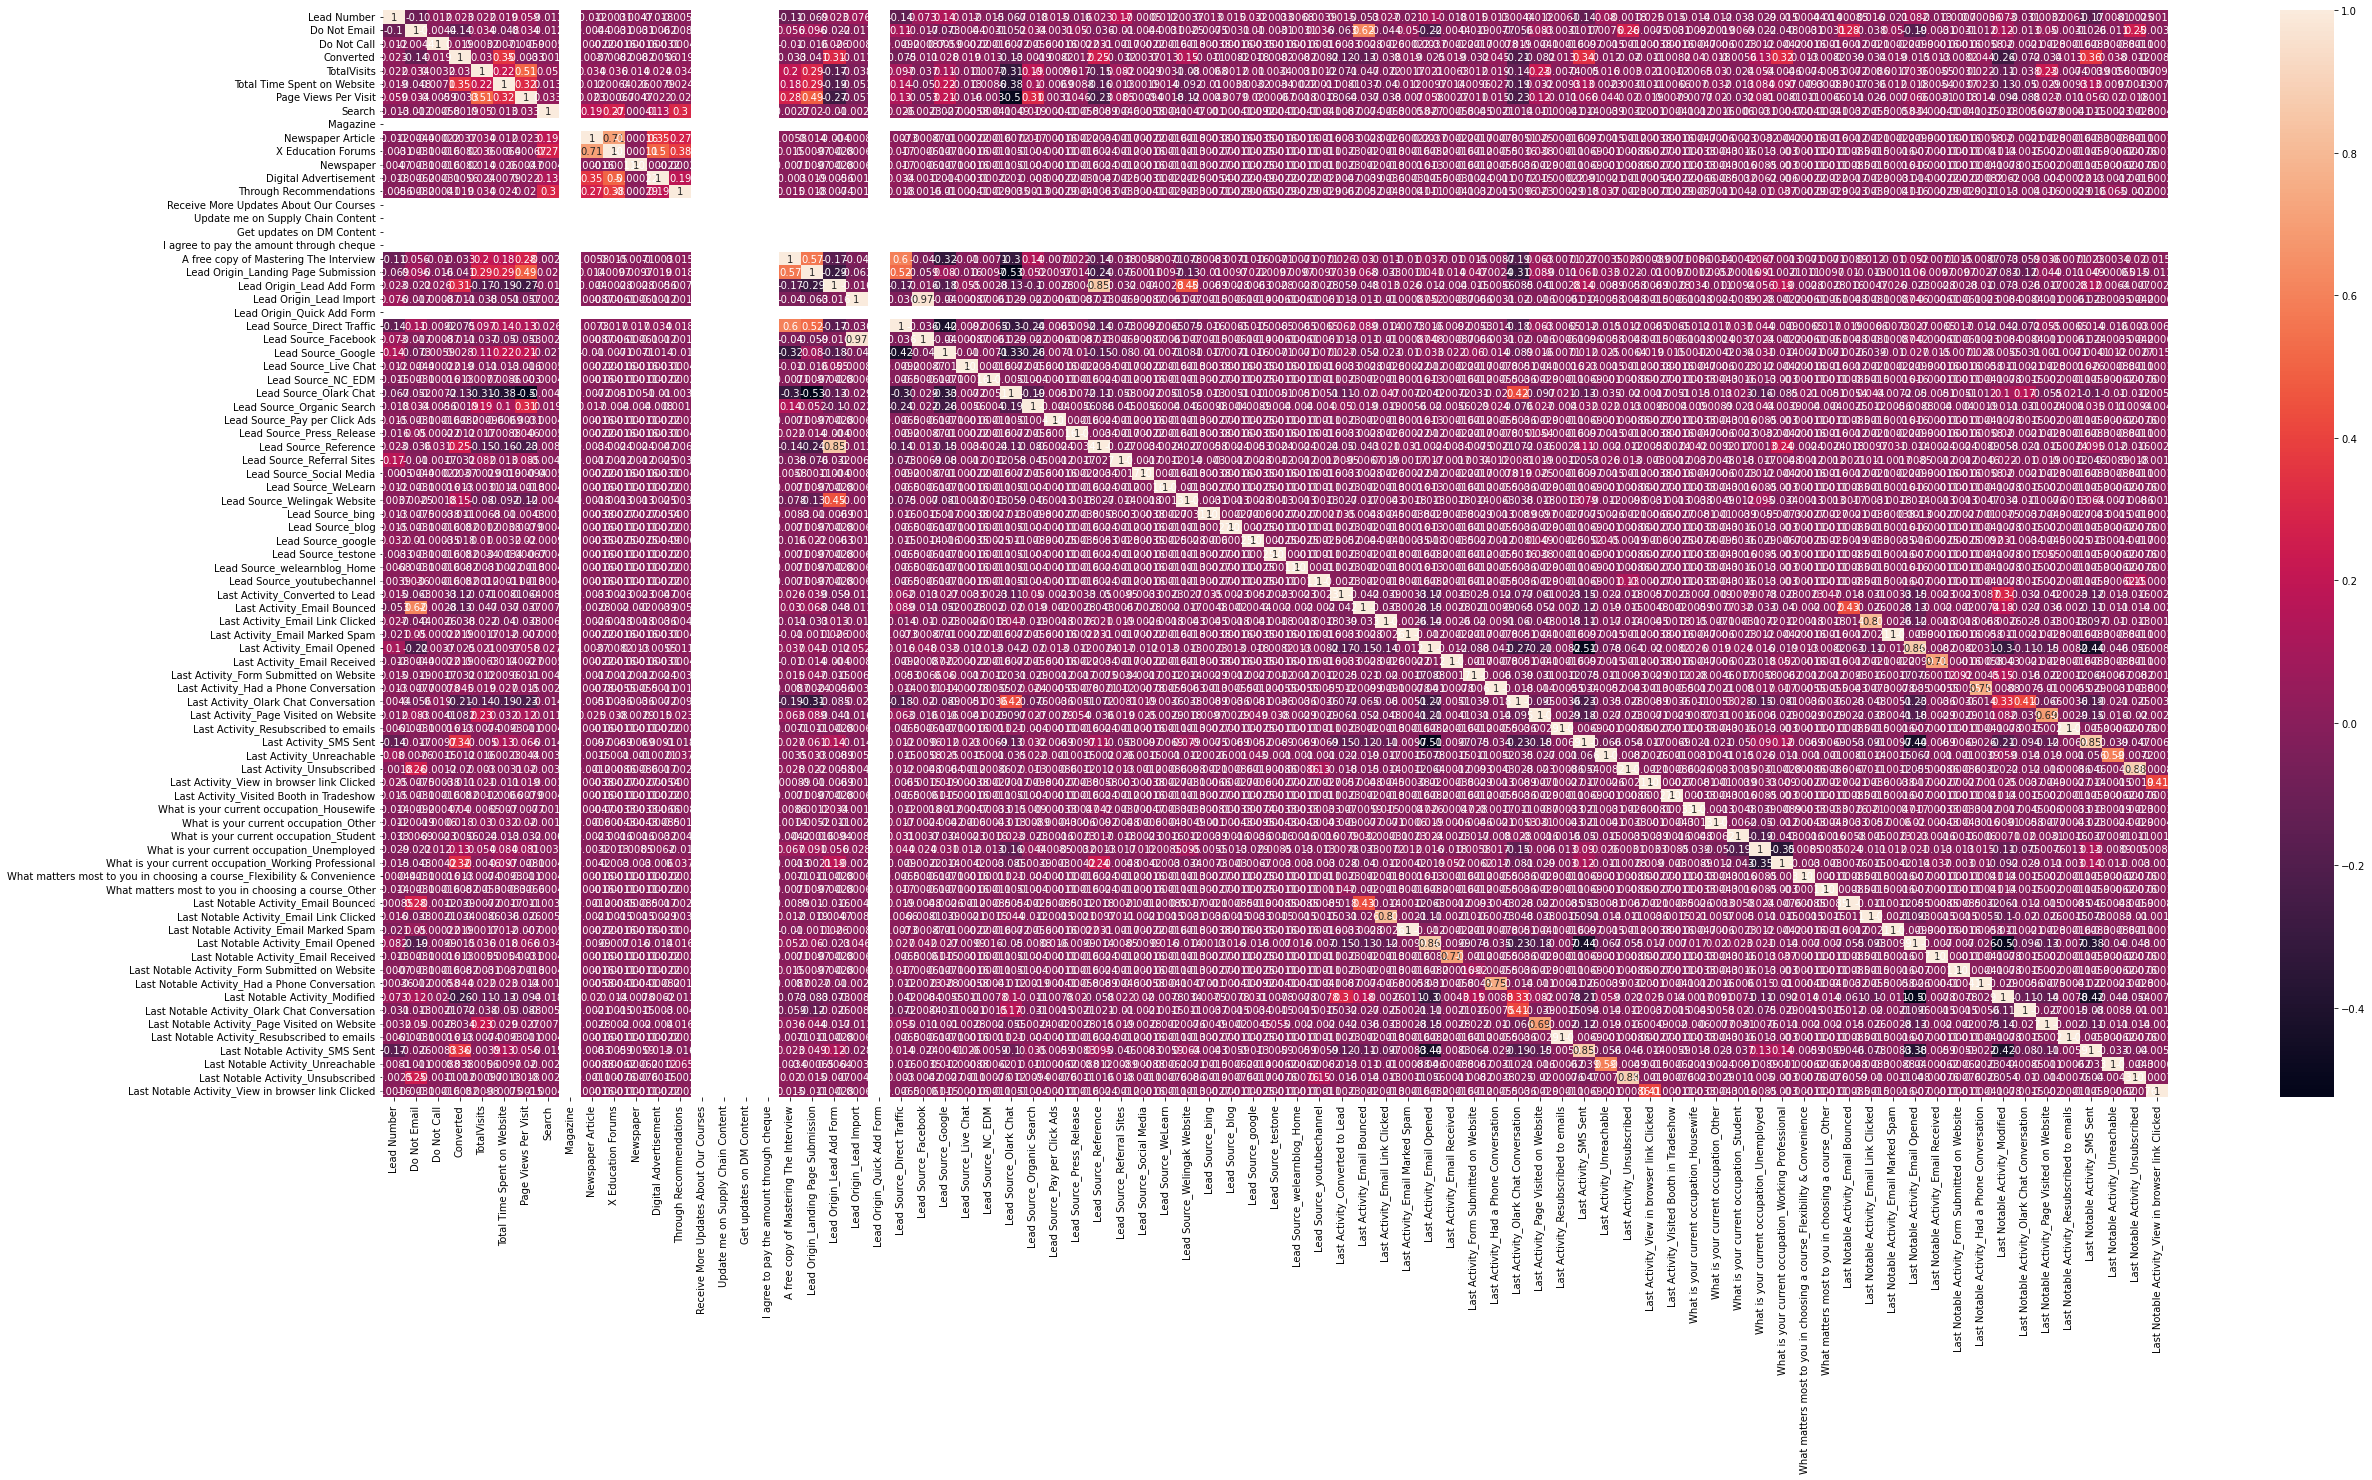

In [52]:
plt.figure(figsize = (40,20))        # Size of the figure
sns.heatmap(leads.corr(),annot = True)
plt.show()

## Model Building

1. Use the RFE - Recursive feature elimination method and select Top 20 varaibles to start with building first model
2. then manually eliminate the varaibles which are not significant  by cheking the p values and VIF scores 

In [53]:
logreg = LogisticRegression()
rfe = RFE(logreg,n_features_to_select=20)            
rfe = rfe.fit(X_train, y_train)

In [54]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 12),
 ('TotalVisits', False, 36),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 38),
 ('Search', False, 52),
 ('Magazine', False, 56),
 ('Newspaper Article', False, 41),
 ('X Education Forums', False, 39),
 ('Newspaper', True, 1),
 ('Digital Advertisement', False, 22),
 ('Through Recommendations', False, 25),
 ('Receive More Updates About Our Courses', False, 59),
 ('Update me on Supply Chain Content', False, 53),
 ('Get updates on DM Content', False, 54),
 ('I agree to pay the amount through cheque', False, 55),
 ('A free copy of Mastering The Interview', False, 51),
 ('Lead Origin_Landing Page Submission', False, 31),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 23),
 ('Lead Origin_Quick Add Form', False, 58),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 47),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 44),
 ('Lead Sou

In [55]:
col = X_train.columns[rfe.support_]

In [56]:
# building first model with the features selected from RFE- Model1
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2565.1
Date:                Sat, 25 Feb 2023   Deviance:                       5130.1
Time:                        21:25:26   Pearson chi2:                 6.26e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4071
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8920      0.112     -7.938      0.000      -1.112      -0.672
Do Not Email                                            -1.3861      0.169     -8.220      0.000      -1.717      -1.056
Total Time Spent on Website                              1.1033      0.041     27.147      0.000       1.024       1.183
Newspaper                                              -24.1210   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Lead Origin_Lead Add Form                                2.4888      0.232     10.744      0.000       2.035       2.943
Lead Source_Direct Traffic                              -1.4285      0.118    -12.123      0.000      -1.659      -1.198
Lead Source_Google                                      -1.0673      0.113     -9.410      0.000      -1.290      -0.845
Lead Source_Organic Search                              -1.2548      0.135     -9.264      0.000      -1.520      -0.989
Lead Source_Referral Sites                              -1.3550      0.361     -3.752      0.000      -2.063      -0.647
Lead Source_Welingak Website                             1.7572      0.751      2.339      0.019       0.285       3.230
Last Activity_Converted to Lead                         -0.7825      0.222     -3.521      0.000      -1.218      -0.347
Last Activity_Had a Phone Conversation                   1.7823      0.637      2.796      0.005       0.533       3.032
Last Activity_Olark Chat Conversation                   -1.0047      0.171     -5.892      0.000      -1.339      -0.671
Last Activity_SMS Sent                                   1.2130      0.076     15.871      0.000       1.063       1.363
What is your current occupation_Housewife               24.1651    1.6e+04      0.002      0.999   -3.13e+04    3.13e+04
What is your current occupation_Other                    1.8622      0.650      2.865      0.004       0.588       3.136
What is your current occupation_Student                  1.3236      0.247      5.359      0.000       0.839       1.808
What is your current occupation_Unemployed               1.1827      0.088     13.366      0.000       1.009       1.356
What is your current occupation_Working Professional     3.7168      0.200     18.566      0.000       3.324       4.109
Last Notable Activity_Modified                          -0.6442      0.086     -7.512      0.000      -0.812      -0.476
Last Notable Activity_Unreachable                        1.7447      0.520      3.353      0.001       0.725       2.765
========================================================================================================================
"""

In [57]:
# drop News paper as it is insignificant with high p value


In [58]:
col = X_train.columns[rfe.support_]

In [59]:
col=col.drop('Newspaper')

In [60]:
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [61]:
# Model 2
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2566.8
Date:                Sat, 25 Feb 2023   Deviance:                       5133.6
Time:                        21:25:26   Pearson chi2:                 6.26e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4067
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8941      0.112     -7.958      0.000      -1.114      -0.674
Do Not Email                                            -1.3844      0.169     -8.212      0.000      -1.715      -1.054
Total Time Spent on Website                              1.1006      0.041     27.116      0.000       1.021       1.180
Lead Origin_Lead Add Form                                2.4888      0.232     10.744      0.000       2.035       2.943
Lead Source_Direct Traffic                              -1.4289      0.118    -12.128      0.000      -1.660      -1.198
Lead Source_Google                                      -1.0640      0.113     -9.386      0.000      -1.286      -0.842
Lead Source_Organic Search                              -1.2516      0.135     -9.245      0.000      -1.517      -0.986
Lead Source_Referral Sites                              -1.3522      0.361     -3.746      0.000      -2.060      -0.645
Lead Source_Welingak Website                             1.7569      0.751      2.338      0.019       0.284       3.229
Last Activity_Converted to Lead                         -0.7805      0.222     -3.514      0.000      -1.216      -0.345
Last Activity_Had a Phone Conversation                   1.7825      0.637      2.797      0.005       0.534       3.031
Last Activity_Olark Chat Conversation                   -1.0042      0.170     -5.891      0.000      -1.338      -0.670
Last Activity_SMS Sent                                   1.2145      0.076     15.897      0.000       1.065       1.364
What is your current occupation_Housewife               24.1642    1.6e+04      0.002      0.999   -3.13e+04    3.14e+04
What is your current occupation_Other                    1.8642      0.650      2.869      0.004       0.591       3.138
What is your current occupation_Student                  1.3239      0.247      5.361      0.000       0.840       1.808
What is your current occupation_Unemployed               1.1812      0.088     13.354      0.000       1.008       1.355
What is your current occupation_Working Professional     3.7160      0.200     18.567      0.000       3.324       4.108
Last Notable Activity_Modified                          -0.6427      0.086     -7.498      0.000      -0.811      -0.475
Last Notable Activity_Unreachable                        1.7453      0.520      3.355      0.001       0.726       2.765
========================================================================================================================
"""

In [62]:
# drop house wife occupation also from the varaible list as it is insignificant with high p values
col=col.drop('What is your current occupation_Housewife')

In [63]:
# model 3
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6353
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2577.8
Date:                Sat, 25 Feb 2023   Deviance:                       5155.6
Time:                        21:25:26   Pearson chi2:                 6.27e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4047
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8690      0.112     -7.779      0.000      -1.088      -0.650
Do Not Email                                            -1.3891      0.168     -8.249      0.000      -1.719      -1.059
Total Time Spent on Website                              1.0998      0.040     27.163      0.000       1.020       1.179
Lead Origin_Lead Add Form                                2.5117      0.231     10.852      0.000       2.058       2.965
Lead Source_Direct Traffic                              -1.4198      0.118    -12.079      0.000      -1.650      -1.189
Lead Source_Google                                      -1.0530      0.113     -9.314      0.000      -1.275      -0.831
Lead Source_Organic Search                              -1.2329      0.135     -9.137      0.000      -1.497      -0.968
Lead Source_Referral Sites                              -1.3514      0.360     -3.751      0.000      -2.058      -0.645
Lead Source_Welingak Website                             1.7445      0.751      2.322      0.020       0.272       3.217
Last Activity_Converted to Lead                         -0.7932      0.222     -3.575      0.000      -1.228      -0.358
Last Activity_Had a Phone Conversation                   1.7703      0.637      2.781      0.005       0.523       3.018
Last Activity_Olark Chat Conversation                   -1.0143      0.170     -5.958      0.000      -1.348      -0.681
Last Activity_SMS Sent                                   1.2031      0.076     15.782      0.000       1.054       1.352
What is your current occupation_Other                    1.8297      0.650      2.817      0.005       0.557       3.103
What is your current occupation_Student                  1.2930      0.247      5.241      0.000       0.810       1.777
What is your current occupation_Unemployed               1.1508      0.088     13.125      0.000       0.979       1.323
What is your current occupation_Working Professional     3.6848      0.200     18.446      0.000       3.293       4.076
Last Notable Activity_Modified                          -0.6402      0.085     -7.490      0.000      -0.808      -0.473
Last Notable Activity_Unreachable                        1.7285      0.520      3.326      0.001       0.710       2.747
========================================================================================================================
"""

In [64]:
# we have all variables with high significance now we will check the VIF scores for multi co linearity among the feature varaibles and we will drop all those varaibles with VIF more than 5
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,What is your current occupation_Unemployed,2.73
16,Last Notable Activity_Modified,2.00
4,Lead Source_Google,1.99
3,Lead Source_Direct Traffic,1.93
2,Lead Origin_Lead Add Form,1.71
11,Last Activity_SMS Sent,1.56
5,Lead Source_Organic Search,1.43
10,Last Activity_Olark Chat Conversation,1.37
15,What is your current occupation_Working Profes...,1.32
7,Lead Source_Welingak Website,1.32


### from the VIF scores we found that there is no multi co linearity among the feature varaibles and from the p values of model 3 all these varaibles are significant 

In [65]:
# with the above final model we will get the predicted values for train data
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.886510
5520    0.120693
1962    0.302258
1566    0.964282
9170    0.334681
5097    0.137296
8954    0.469146
309     0.229717
5519    0.346406
1050    0.611911
dtype: float64

In [66]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:20]

array([0.88650969, 0.1206933 , 0.30225776, 0.96428227, 0.33468117,
       0.13729586, 0.46914634, 0.2297172 , 0.34640621, 0.61191101,
       0.2218677 , 0.05739706, 0.12198294, 0.11860364, 0.62620533,
       0.05051125, 0.20768505, 0.02376324, 0.03050088, 0.01015727])

##### Creating a dataframe with the actual Predicted  flag and the predicted probabilities


In [67]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.886510,7962
1,0,0.120693,5520
2,0,0.302258,1962
3,1,0.964282,1566
4,0,0.334681,9170


In [68]:
# now lets asume the propobaility 0.5 as threshhold and create new column predicted with 1 if converted_prob>0.5 and 0 if it is less than 0.50
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.886510,7962,1
1,0,0.120693,5520,0
2,0,0.302258,1962,0
3,1,0.964282,1566,1
4,0,0.334681,9170,0


In [69]:
# Model Evaluation metrics on train data
# Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3524  429]
 [ 736 1683]]


In [70]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8171688637790333


In [71]:
# other Metrics 
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [72]:
print("sensitivity:",TP / float(TP+FN))
print("Specificity:",TN / float(TN+FP))
print("False Positive Rate:",FP/ float(TN+FP))
print("Positive Predicted value:",TP / float(TP+FP))


sensitivity: 0.6957420421661844
Specificity: 0.8914748292436124
False Positive Rate: 0.10852517075638755
Positive Predicted value: 0.796875


# ROC Curve
### we ahve used the random thresh hold probability of 0.50, we will check more scientific way of arriving at the thresh hold value i.e ROC curve- Trade off between Sensitivity and specificity

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [73]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [74]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

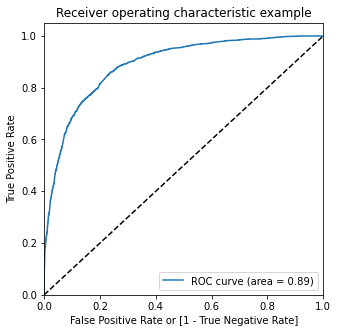

In [75]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### optimal cut off point - thresh hold probaility is where we get balance between Sensitivity and Specificity

In [76]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.886510,7962,1,1,1,1,1,1,1,1,1,1,0
1,0,0.120693,5520,0,1,1,0,0,0,0,0,0,0,0
2,0,0.302258,1962,0,1,1,1,1,0,0,0,0,0,0
3,1,0.964282,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.334681,9170,0,1,1,1,1,0,0,0,0,0,0


In [77]:
# calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.630571  0.970236  0.422717
0.2   0.2  0.753923  0.914427  0.655705
0.3   0.3  0.795512  0.863993  0.753605
0.4   0.4  0.812461  0.770153  0.838351
0.5   0.5  0.817169  0.695742  0.891475
0.6   0.6  0.810891  0.627532  0.923096
0.7   0.7  0.787037  0.523357  0.948394
0.8   0.8  0.760358  0.422075  0.967367
0.9   0.9  0.716416  0.274494  0.986845


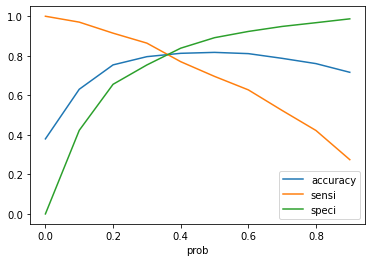

In [78]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### from the above graph the optimal value/ Thresh hold probability is approximately 0.35

In [79]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.886510,7962,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.120693,5520,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.302258,1962,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.964282,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.334681,9170,0,1,1,1,1,0,0,0,0,0,0,0


In [80]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)*100

80.4300062774639

In [81]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3193,  760],
       [ 487, 1932]], dtype=int64)

In [82]:
TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0] 

In [83]:
print("sensitivity:",TP / float(TP+FN))
print("Specificity:",TN / float(TN+FP))
print("False Positive Rate:",FP/ float(TN+FP))
print("Positive Predicted value:",TP / float(TP+FP))

sensitivity: 0.798677139313766
Specificity: 0.8077409562357702
False Positive Rate: 0.1922590437642297
Positive Predicted value: 0.7176820208023774


### from the above we got almost equal sensitivity and specificity 

In [84]:
## lets look at other evaluation metrics Precision and Recall

precision=TP/(TP+FP)
precision

0.7176820208023774

In [85]:
recall=TP/(TP+FN)
recall

0.798677139313766

In [86]:
# we can also get the recall and precision score by using a method from sklearn library
from sklearn.metrics import precision_score, recall_score
print("Precision Score:", precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
print("Recall Socre:", recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
      


Precision Score: 0.796875
Recall Socre: 0.6957420421661844


# making predictions on test data

In [87]:
# scaling the numerical varibles of test data

X_test[num_var_list] = scaler.transform(X_test[num_var_list])

X_test[num_var_list].head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
3504,-0.092900,-0.103815,0.289261
4050,-0.683873,-0.881052,-1.077404
7201,-0.289891,0.424120,-0.166294
1196,0.104091,-0.105648,0.744816
8219,0.695064,-0.428274,-0.280183


In [88]:
X_test = X_test[col]
X_test[col].head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Unreachable
3504,0,-0.103815,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4050,0,-0.881052,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
7201,1,0.424120,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1196,0,-0.105648,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
8219,0,-0.428274,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [89]:
X_test_sm = sm.add_constant(X_test)

In [90]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:20]

3504    0.256323
4050    0.953807
7201    0.297874
1196    0.255939
8219    0.166744
8747    0.137296
9048    0.276064
6524    0.115722
7693    0.119569
8187    0.953807
3559    0.137296
6940    0.029527
8743    0.626205
2603    0.763691
7434    0.018458
4726    0.845964
3764    0.510503
6545    0.109019
6772    0.485719
6599    0.129447
dtype: float64

In [91]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3504,0.256323
4050,0.953807
7201,0.297874
1196,0.255939
8219,0.166744


In [92]:
y_test_df = pd.DataFrame(y_test)
y_test_df['Lead Number'] = y_test_df.index


In [93]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [94]:
y_pred_final.head()

,Converted,Lead Number,0
3504,0,3504,0.256323
4050,1,4050,0.953807
7201,0,7201,0.297874
1196,0,1196,0.255939
8219,1,8219,0.166744


In [95]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [96]:
y_pred_final.head()

,Converted,Lead Number,Converted_prob
3504,0,3504,0.256323
4050,1,4050,0.953807
7201,0,7201,0.297874
1196,0,1196,0.255939
8219,1,8219,0.166744


In [99]:
# Let's check the overall accuracy.
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Converted,Lead Number,Converted_prob,final_predicted
3504,0,3504,0.256323,0
4050,1,4050,0.953807,1
7201,0,7201,0.297874,0
1196,0,1196,0.255939,0
8219,1,8219,0.166744,0


In [101]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8092273892347126

In [102]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1367,  322],
       [ 199,  843]], dtype=int64)

In [103]:
TP = confusion3[1,1]  
TN = confusion3[0,0] 
FP = confusion3[0,1] 
FN = confusion3[1,0]

In [104]:
print("sensitivity:",TP / float(TP+FN))
print("Specificity:",TN / float(TN+FP))
print("False Positive Rate:",FP/ float(TN+FP))
print("Positive Predicted value:",TP / float(TP+FP))

sensitivity: 0.809021113243762
Specificity: 0.8093546477205447
False Positive Rate: 0.1906453522794553
Positive Predicted value: 0.7236051502145923


### accuracy of test data is 80.92% and on train data is 80.43%
### model 3 is doing good